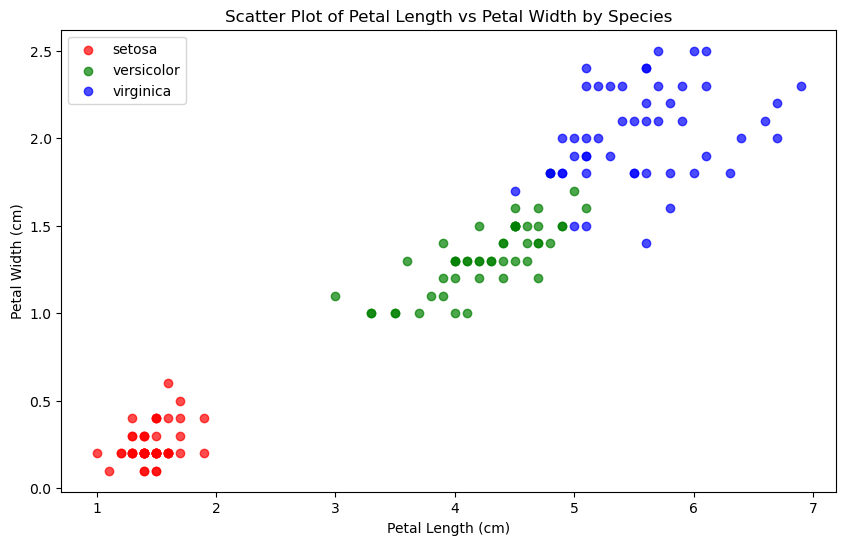

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



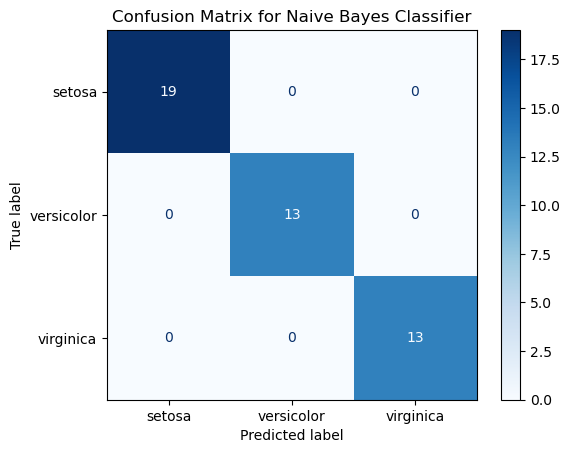

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset
data = load_iris()

# Convert the dataset into a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Extract petal length, petal width, and target for scatter plot
petal_length = df['petal length (cm)']
petal_width = df['petal width (cm)']
species = df['target']

# Step 2: Split the dataset into features (X) and target (y)
X = df.iloc[:, [2, 3]]  # Selecting petal length and width as features
y = df['target']        # Target column

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize and train the Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Scatter plot of petal length vs petal width by species
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
species_names = data.target_names

for i in range(3):  # Iterate over the 3 species
    plt.scatter(
        petal_length[species == i],
        petal_width[species == i],
        color=colors[i],
        label=species_names[i],
        alpha=0.7
    )

plt.title("Scatter Plot of Petal Length vs Petal Width by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()

# Step 6: Display accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=species_names))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=species_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()
